In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
import urllib
import requests
import os
import io
import json
import pylab as pl
import shapely
from fiona.crs import from_epsg
import json
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [21]:
gs=gpd.GeoDataFrame.from_file("/nfshome"+"/cl4855"+"/ADS"+"/How-greenspace-makes-the-green"+"/Green Spaces"+"/geo_export_082cf1b6-52ed-40bb-9b52-13945bdb1f98.shp")

In [22]:
gs.crs

{'init': 'epsg:4326'}

In [4]:
gs.head()

,feat_code,landuse,park_name,parknum,shape_area,shape_leng,source_id,status,sub_code,system,geometry
0,4910.0,Community Park,Commodore Barry Park,B021,41539.801363,829.420107,2.149100e+10,Updated,491050.0,None,POLYGON ((-73.97922375065221 40.69799879369959...
1,4980.0,Neighborhood Park,Pierrepont Playground,B222,21960.494920,607.555193,2.149800e+10,Unchanged,498000.0,None,POLYGON ((-73.99732028095745 40.69600764072165...
2,4980.0,Neighborhood Park,Cobble Hill Park,B326,28079.076265,784.421990,2.149800e+10,Unchanged,498000.0,None,POLYGON ((-73.99557419919979 40.68792918280799...
3,4980.0,Community Park,Commodore Barry Park,B021,438416.114511,2672.710150,2.149800e+10,Unchanged,498000.0,None,POLYGON ((-73.97746661925957 40.69650941986475...
4,4980.0,Triangle/Plaza,Brooklyn Heights Promenade,B223DG,14465.699799,1376.106398,2.149800e+10,Unchanged,498000.0,None,POLYGON ((-73.99746719287955 40.69692380834881...


In [9]:
gs.shape_area.describe()

count    1.249100e+04
mean     9.427334e+04
std      9.924306e+05
min      2.229973e+01
25%      1.534914e+03
50%      3.578557e+03
75%      1.670844e+04
max      6.299085e+07
Name: shape_area, dtype: float64

In [14]:
bin = [0,1535,3578,16708,62990850]

In [15]:
gs['area'] = pd.cut(gs['shape_area'],bin)

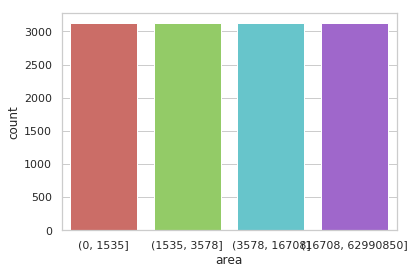

In [20]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x = 'area', data = gs, palette = 'hls')
plt.show()

In [65]:
facility=pd.read_csv("/nfshome"+"/cl4855"+"/ADS"+"/How-greenspace-makes-the-green"+"/Parks Zones"+"/Directory_of_Parks_Disability_Accessibility_Facilities_and_Programs.csv")

In [66]:
facility.head()

,Name,Location,Type
0,Tremont Park,Arthur Avenue & East Tremont Avenue,Bocce Courts
1,Ferry Point Park,Corner of Balcom Avenue and Dewey Avenue,Basketball Courts
2,Franz Sigel Park,E 153 St. & Grand Concourse,Basketball Courts
3,Gun Hill Playground,Holland Ave. & Magenta St.,Basketball Courts
4,Macombs,E 158th St. & Ruppert Plaza,Basketball Courts


In [67]:
df=pd.DataFrame(facility.groupby(['Name','Type']).size().reset_index())

In [71]:
df.head()

,Name,Type,count
0,100% Playground,Playgrounds,1
1,110th St & Lenox Ave Playground,Playgrounds,1
2,110th St Playground,Playgrounds,1
3,115th Street Playground,Playgrounds,1
4,157th St Playground,Playgrounds,1


In [72]:
facility=pd.pivot_table(df,index='Name',columns='Type',values='count',fill_value=0)

In [77]:
facility=facility.reset_index()

In [79]:
parkfa=gs.merge(facility,left_on="park_name",right_on="Name")

In [81]:
parkfa.head()

,feat_code,landuse,park_name,parknum,shape_area,shape_leng,source_id,status,sub_code,system,...,Bathrooms,Beaches,Bocce Courts,Football Fields,Ice Skating Rinks,Nature Centers,Playgrounds,Pools,Recreation Centers,Tennis Courts
0,4910.0,Community Park,Commodore Barry Park,B021,41539.801363,829.420107,2.149100e+10,Updated,491050.0,None,...,0,0,0,0,0,0,1,0,0,0
1,4980.0,Community Park,Commodore Barry Park,B021,438416.114511,2672.710150,2.149800e+10,Unchanged,498000.0,None,...,0,0,0,0,0,0,1,0,0,0
2,4910.0,None,Commodore Barry Park,B021,1367.776917,150.944950,2.149100e+10,Unchanged,491030.0,B021-HANDBALL-478,...,0,0,0,0,0,0,1,0,0,0
3,4910.0,None,Commodore Barry Park,B021,1489.199265,156.314948,2.149100e+10,Unchanged,491030.0,B021-HANDBALL-477,...,0,0,0,0,0,0,1,0,0,0
4,4900.0,None,Commodore Barry Park,B021,12984.710802,423.901175,2.149000e+10,Unchanged,490020.0,B021-BASEBALL-151,...,0,0,0,0,0,0,1,0,0,0


In [3]:
toliet=pd.read_csv("/nfshome"+"/cl4855"+"/ADS"+"/How-greenspace-makes-the-green"+"/Parks Zones"+"/Directory_Of_Toilets_In_Public_Parks.csv")

In [4]:
toliet.head()

,Name,Location,Open Year-Round,Handicap Accessible,Borough,Comments
0,100% Playground,"Glenwood Road, East 100 & East 101 streets",Yes,NaN,Brooklyn,NaN
1,174th Street Playground,"East 174 Street, Stratford Avenue, Bronx River...",Yes,NaN,Bronx,NaN
2,227 Street Playground,Bronx Boulevard between East 226 and East 228 ...,Yes,Yes,Bronx,NaN
3,Abe Lincoln,"East 135 Street, between Madison & 5 avenues",Yes,NaN,Manhattan,NaN
4,Abigail Playground,"East 156 Street, Tinton Avenue",No,NaN,Bronx,NaN


In [29]:
basketball=pd.read_json("/nfshome"+"/cl4855"+"/ADS"+"/How-greenspace-makes-the-green"+"/Parks Zones"+"/DPR_Basketball_001.json")

In [30]:
basketball.dropna()
basketball['lonlat']=list(zip(basketball.lon,basketball.lat))
basketball['geometry']=basketball[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))

In [31]:
basketball=gpd.GeoDataFrame(basketball)
basketball.crs = from_epsg(4326)

In [32]:
basketball.head()

,Accessible,Location,Name,Num_of_Courts,Prop_ID,lat,lon,lonlat,geometry
0,N,E 174 St. & Bronx River Ave.,174th Street Playground,NaN,X159,40.8342,-73.8775,"(-73.8775, 40.8342)",POINT (-73.8775 40.8342)
1,N,Kelly St. & Ave. St. John,52 Playground,NaN,X179,40.8149,-73.9021,"(-73.9021, 40.8149)",POINT (-73.9021 40.8149)
2,N,Tinton Ave. & E 156 St.,Abigail Adams Playground,NaN,X216,40.8172,-73.9044,"(-73.9044, 40.8172)",POINT (-73.9044 40.8172)
3,N,Barnes Ave. & E 215 St.,Agnes Haywood Playground,NaN,X169,40.8804,-73.8619,"(-73.8619, 40.8804)",POINT (-73.86190000000001 40.8804)
4,N,Bouck & Throop Aves.,Allerton Playground,NaN,X172,40.8659,-73.8503,"(-73.8503, 40.8659)",POINT (-73.8503 40.8659)


In [33]:
runtrack=pd.read_json("/nfshome"+"/cl4855"+"/ADS"+"/How-greenspace-makes-the-green"+"/Parks Zones"+"/DPR_RunningTracks_001.json")

In [34]:
runtrack.dropna()
runtrack['lonlat']=list(zip(runtrack.lon,runtrack.lat))
runtrack['geometry']=runtrack[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))
runtrack=gpd.GeoDataFrame(runtrack)
runtrack.crs = from_epsg(4326)

In [35]:
runtrack.head()

,Location,Name,Prop_ID,RunningTracks_Type,Size,lat,lon,lonlat,geometry
0,161st and Deegan (the south side of the Macomb...,Macombs Dam,X030,Mondo,0.25,40.8284,-73.9261,"(-73.9261, 40.8284)",POINT (-73.92610000000001 40.8284)
1,Bruckner Boulevard & Eastchester Bay,Pelham Bay Park,X039,Mondo,0.25,40.8491,-73.8230,"(-73.823, 40.8491)",POINT (-73.82299999999999 40.8491)
2,West 240 Street to City Line,Van Cortlandt Park,X092,Rubber,1.25,NaN,NaN,"(nan, nan)",POINT (nan nan)
3,Lafayette & Colgate avenues,Soundview Park,X118,Asphalt,0.25,40.8178,-73.8728,"(-73.8728, 40.8178)",POINT (-73.8728 40.8178)
4,East 145th Street & Jackson Avenue,St. Mary's Park,X045,Rubber,0.12,40.8111,-73.9110,"(-73.911, 40.8111)",POINT (-73.911 40.8111)


In [14]:
dogrun=pd.read_json("/nfshome"+"/cl4855"+"/ADS"+"/How-greenspace-makes-the-green"+"/Parks Zones"+"/DPR_DogRuns_001.json")

In [15]:
dogrun.head()

,Accessible,Address,DogRuns_Type,Name,Notes,Prop_ID
0,N,Unionport & Sagamore on Bronx Park East to 233...,Off-Leash,Bronx Park Off-Leash Area,None,X002
1,N,None,Off-Leash,Claremont Park Off-Leash Area,None,X008
2,N,Except for playgrounds and other areas where d...,Off-Leash,Crotona Park Off-Leash Area,None,X010
3,N,192nd & Jerome Avenue,Off-Leash,Devoe Park Off-Leash Area,None,X013
4,N,"Riverdale to Johnson avenues, south of West 23...",Run,Ewen Park Dog Run,None,X019


In [36]:
tennis=pd.read_json("/nfshome"+"/cl4855"+"/ADS"+"/How-greenspace-makes-the-green"+"/Parks Zones"+"/DPR_Tennis_001.json")

In [37]:
tennis.dropna()
tennis['lonlat']=list(zip(tennis.lon,tennis.lat))
tennis['geometry']=tennis[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))
tennis=gpd.GeoDataFrame(tennis)
tennis.crs = from_epsg(4326)

In [38]:
tennis.head()

,Accessible,Courts,Indoor_Outdoor,Info,Location,Name,Phone,Prop_ID,Tennis_Type,lat,lon,lonlat,geometry
0,N,6,Outdoor,None,Bronx Park East and Brady Ave.,Bronx Park,(718) 430-1821,X002,Hard,40.8511,-73.8704,"(-73.8704, 40.8511)",POINT (-73.8704 40.8511)
1,Y,22,Indoor,Lessons are offered. During the indoor season ...,E. 173d St. and Crotona Ave.,Cary Leeds Tennis Center at Crotona Park,(718) 247-7420,X010,Hard,40.8394,-73.8951,"(-73.8951, 40.8394)",POINT (-73.8951 40.8394)
2,Y,6,Outdoor,None,"Hammersley, Ely, and Gunther Aves.",Haffen Park,(718) 379-8347,X196,Hard,40.8740,-73.8400,"(-73.84, 40.874)",POINT (-73.84 40.874)
3,N,10,Outdoor,None,Bruckner Blvd. and Middletown Rd.,Pelham Bay Park,(718) 885-3442,X039,Hard,NaN,NaN,"(nan, nan)",POINT (nan nan)
4,N,6,Outdoor,Lessons Offered,"W. 232nd to 235th St., Palisade and Independen...",Seton Park,(718) 601-6044,X201,Hard,40.8853,-73.9164,"(-73.9164, 40.8853)",POINT (-73.9164 40.8853)
